In [9]:
#import the libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt

(480, 640)


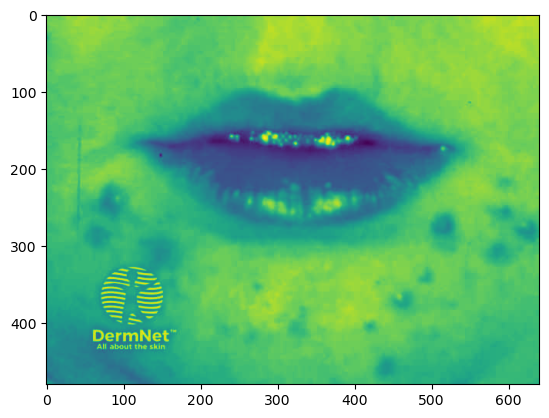

In [37]:
#lets lead the image
image=cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
print(image.shape)

(480, 640, 3)


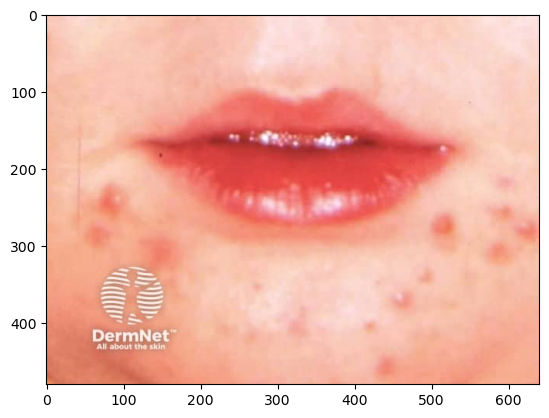

In [33]:
# Converting BGR color to RGB color format
RGB_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
print(RGB_img.shape)

In [39]:
#define the kernels
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
box_blur_kernel = np.ones((3, 3)) / 9
gaussian_blur_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

In [41]:
from scipy.signal import convolve2d,correlate2d

In [ ]:
#kernels -->filters or convolution matriecs-->funcdamentalimage processing
#used particular in Edges detections,shrpening and blurring
# types of kernels
'''
Identify Kernel: unchanged in image ,provide basic baseline references

'''

In [45]:
# Apply Convolution
conv_identity = convolve2d(image, identity_kernel, mode='same', boundary='wrap')
conv_edge = convolve2d(image, edge_kernel, mode='same', boundary='wrap')
conv_sharpen = convolve2d(image, sharpen_kernel, mode='same', boundary='wrap')
conv_box_blur = convolve2d(image, box_blur_kernel, mode='same', boundary='wrap')
conv_gaussian_blur = convolve2d(image, gaussian_blur_kernel, mode='same', boundary='wrap')

In [53]:
print(conv_identity.shape)
print(conv_edge.shape)
print(conv_sharpen.shape)
print(conv_box_blur.shape)
print(conv_gaussian_blur.shape)

(480, 640)
(480, 640)
(480, 640)
(480, 640)
(480, 640)


In [55]:
# Apply Correlation
corr_identity = correlate2d(image, identity_kernel, mode='same', boundary='wrap')
corr_edge = correlate2d(image, edge_kernel, mode='same', boundary='wrap')
corr_sharpen = correlate2d(image, sharpen_kernel, mode='same', boundary='wrap')
corr_box_blur = correlate2d(image, box_blur_kernel, mode='same', boundary='wrap')
corr_gaussian_blur = correlate2d(image, gaussian_blur_kernel, mode='same', boundary='wrap')

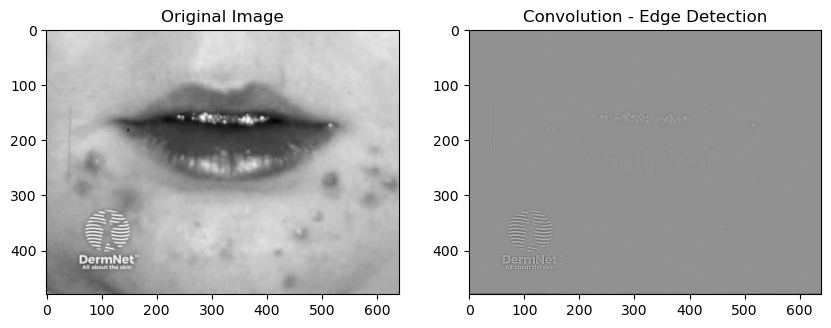

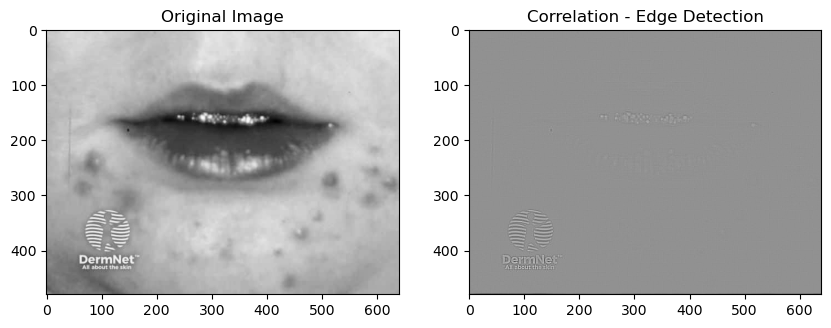

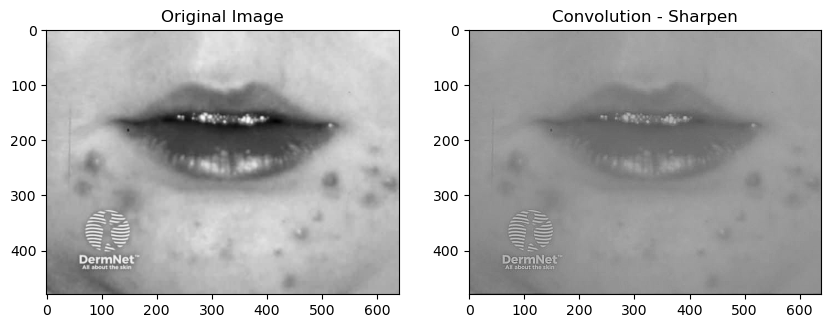

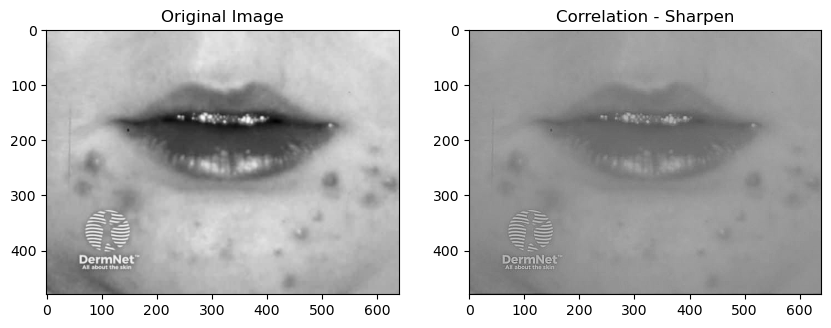

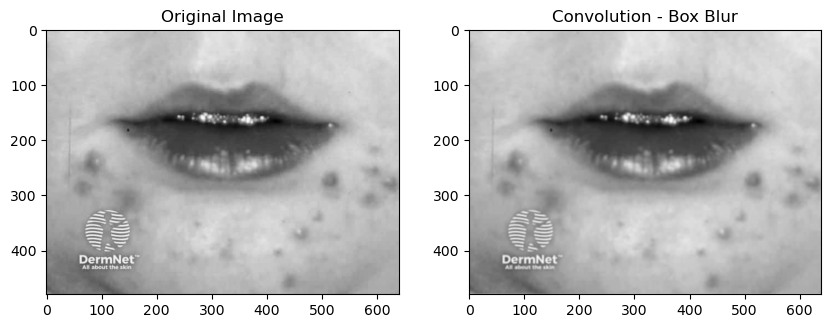

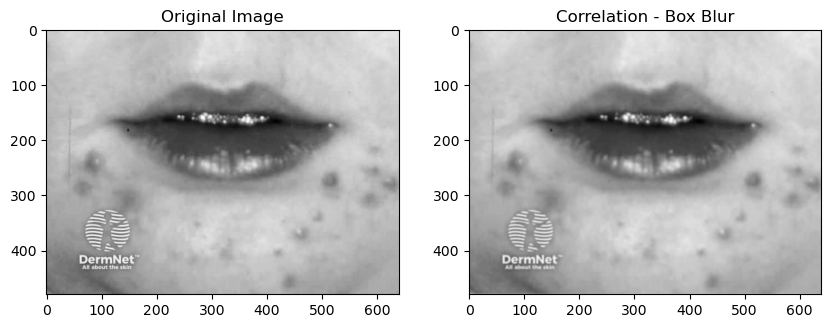

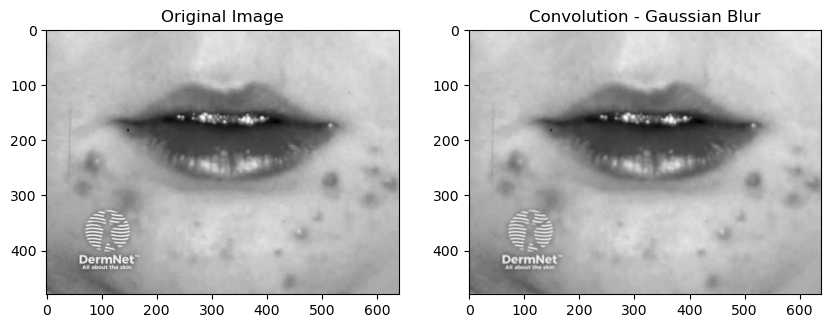

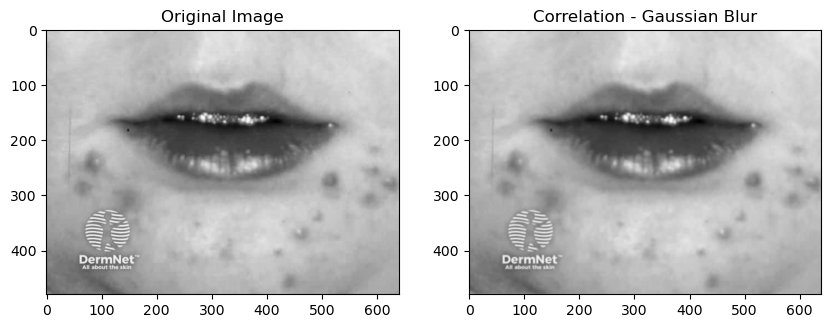

In [61]:
# Display Results
def display_results(title, original, processed):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(processed, cmap='gray')
    plt.show()

# Show images
display_results('Convolution - Edge Detection', image, conv_edge)
display_results('Correlation - Edge Detection', image, corr_edge)
display_results('Convolution - Sharpen', image, conv_sharpen)
display_results('Correlation - Sharpen', image, corr_sharpen)
display_results('Convolution - Box Blur', image, conv_box_blur)
display_results('Correlation - Box Blur', image, corr_box_blur)
display_results('Convolution - Gaussian Blur', image, conv_gaussian_blur)
display_results('Correlation - Gaussian Blur', image, corr_gaussian_blur)

In [63]:
# Apply Sampling with Interpolation Methods
scale_factor = 0.5  # Downscale factor
image_small = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

nearest = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_NEAREST)
bilinear = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_LINEAR)
bicubic = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_CUBIC)
lanczos = cv2.resize(image_small, image.shape[::-1], interpolation=cv2.INTER_LANCZOS4)

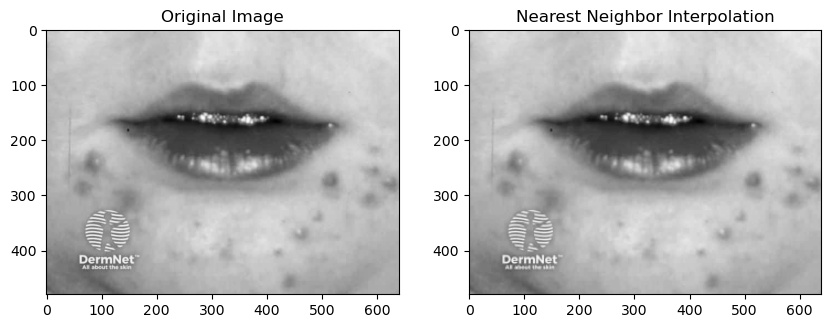

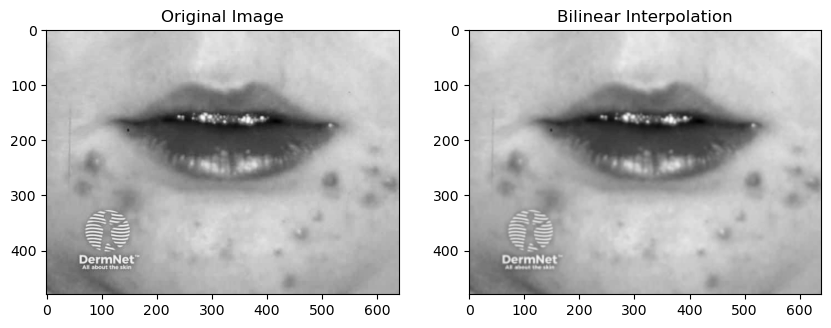

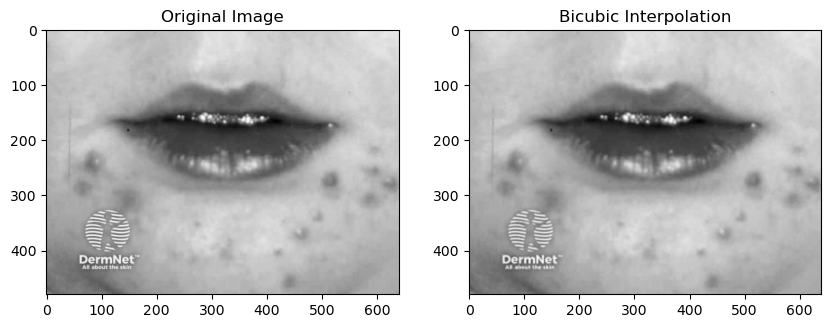

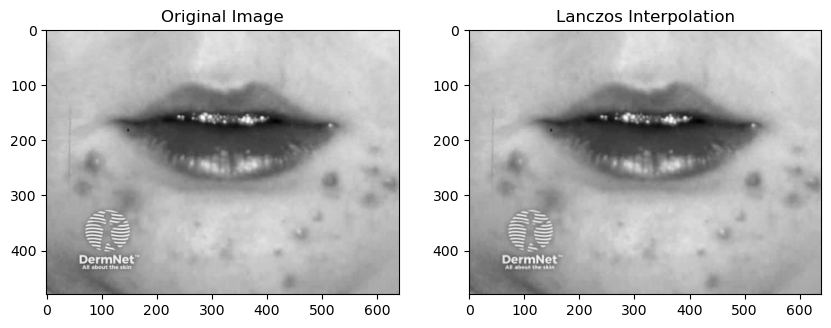

In [67]:
display_results('Nearest Neighbor Interpolation', image, nearest) #closest pixel value without averaging.
display_results('Bilinear Interpolation', image, bilinear) #Averages the values of the four nearest neighbors.
display_results('Bicubic Interpolation', image, bicubic) #weighted average of 16 nearby pixels.
display_results('Lanczos Interpolation', image, lanczos) #sinc function to calculate new pixel values.